Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
# from plotnine import *

from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA

In [2]:
customer_df = pd.read_csv('Customer Data.csv')
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [3]:
customer_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


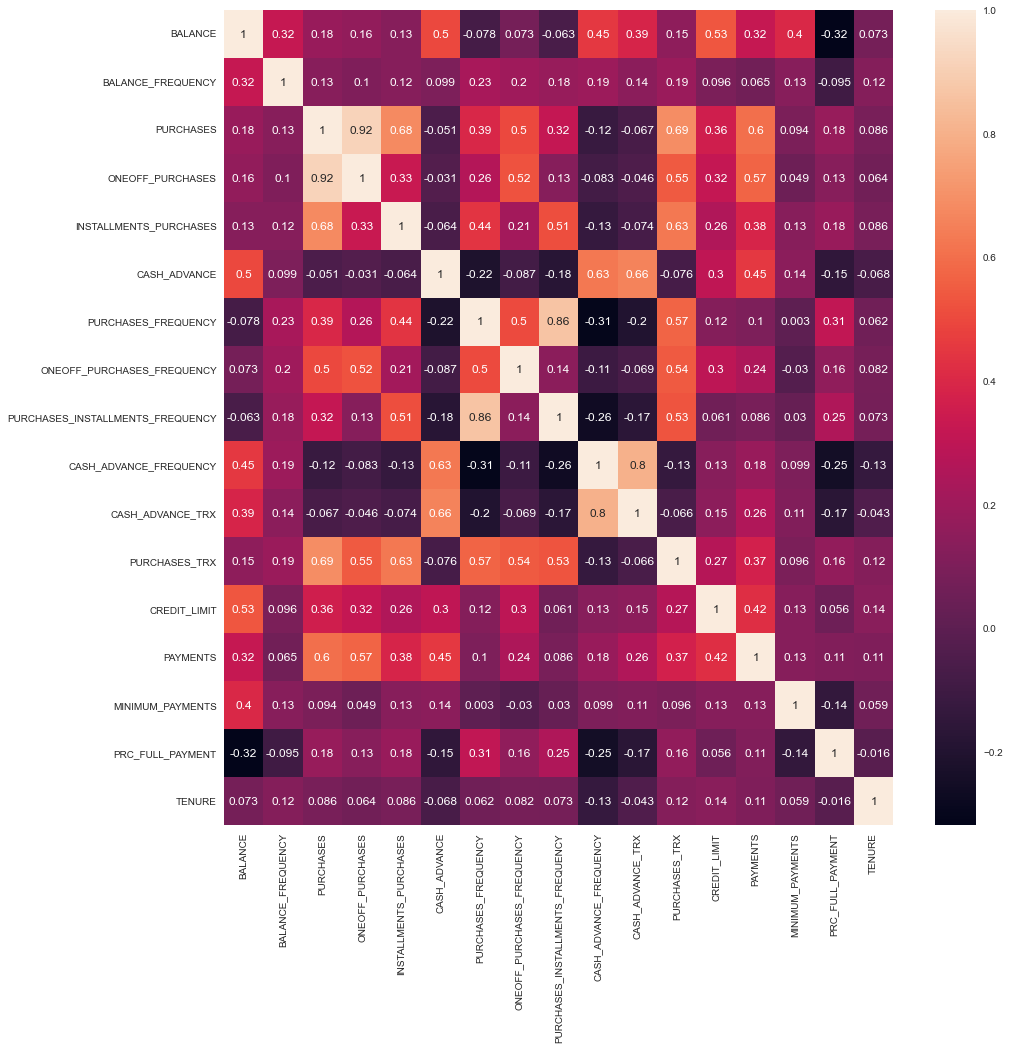

In [4]:
plt.figure(figsize=(15,15))
sns.heatmap(customer_df.corr(), annot=True)
plt.show()

Null values in each column in customer_df

In [5]:
customer_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Fill null values with mean

In [6]:
customer_df['MINIMUM_PAYMENTS'] = customer_df['MINIMUM_PAYMENTS'].fillna(customer_df['MINIMUM_PAYMENTS'].mean())
customer_df['CREDIT_LIMIT'] = customer_df['CREDIT_LIMIT'].fillna(customer_df['CREDIT_LIMIT'].mean())


In [7]:
customer_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
customer_df = customer_df.drop('CUST_ID',axis = 1)


In [9]:
scaler_customer_df = customer_df.copy()
col_names = customer_df.columns
features = customer_df[col_names]
scaler = MinMaxScaler()
scaler_customer_df[col_names] = scaler.fit_transform(features.values)
scaler_customer_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.006419,0.000640,0.500000,0.0
8946,0.001007,1.000000,0.006118,0.000000,0.013333,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.005439,0.011310,0.000000,0.0
8947,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,0.00000,0.013966,0.031720,0.001602,0.001078,0.250000,0.0
8948,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,0.01626,0.000000,0.015025,0.001036,0.000729,0.250000,0.0


In [10]:
# scaler = MinMaxScaler()
# # scaler_customer_df = normalize(customer_df)
# # scaler_customer_df = scaler.fit_transform(customer_df)
# scaler_customer_df = pd.DataFrame(customer_df)

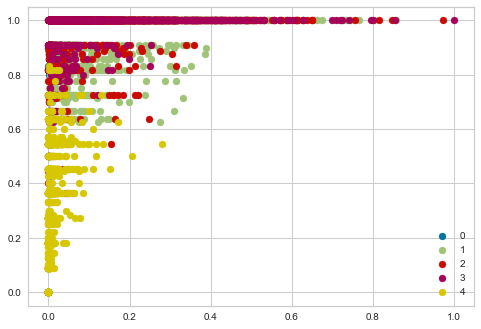

In [11]:
k_mean = KMeans(n_clusters=5).fit(scaler_customer_df)
k_labels = k_mean.labels_
k_predict = k_mean.fit_predict(scaler_customer_df)
unique_labels = np.unique(k_predict)
for i in unique_labels:
    plt.scatter(scaler_customer_df.iloc[k_predict == i , 0] , scaler_customer_df.iloc[k_predict == i , 1] , label = i)
plt.legend()
plt.show()

In [12]:
print("Silhouette Coefficient For Kmeans : %0.3f" % silhouette_score(scaler_customer_df,k_labels))

Silhouette Coefficient For Kmeans : 0.319


Enhancing Kmean model using PCA

In [13]:
pca = PCA()
df_pca =pca.fit_transform(scaler_customer_df) 
pca.explained_variance_ratio_

array([4.95972062e-01, 1.40540442e-01, 1.28444886e-01, 7.67657200e-02,
       6.96341162e-02, 3.58857827e-02, 1.81931037e-02, 1.35286304e-02,
       6.55491219e-03, 5.50923206e-03, 2.84138895e-03, 1.85835317e-03,
       1.26760866e-03, 1.22588168e-03, 1.05724309e-03, 7.20605839e-04,
       3.12590252e-08])

Text(0, 0.5, 'cumulative explained variance')

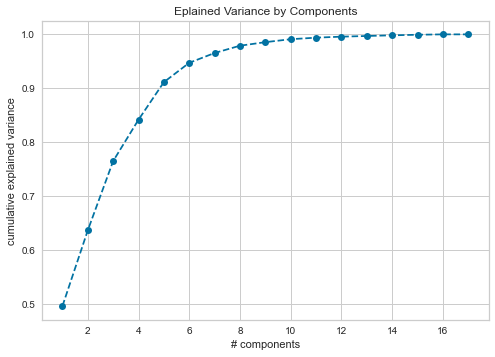

In [14]:
plt.plot(range(1,len(scaler_customer_df.columns)+1),pca.explained_variance_ratio_.cumsum(),marker = 'o',linestyle = '--')
plt.title('Eplained Variance by Components')
plt.xlabel('# components')
plt.ylabel('cumulative explained variance')

In [15]:
pca = PCA(3)
df_pc = pca.fit(scaler_customer_df)
_trans = pca.transform(scaler_customer_df)

df_trans = pd.DataFrame(data= _trans)
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8950 non-null   float64
 1   1       8950 non-null   float64
 2   2       8950 non-null   float64
dtypes: float64(3)
memory usage: 209.9 KB


In [16]:
# plt.scatter(df_trans)

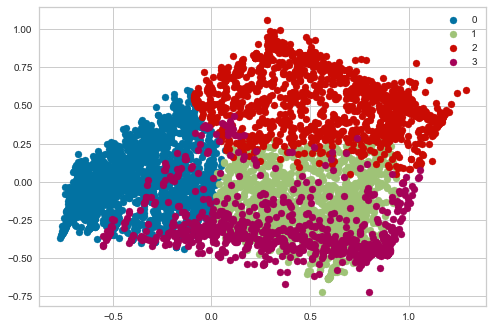

In [17]:
k_mean = KMeans(n_clusters=4).fit(df_trans)
k_labels = k_mean.labels_
k_predict = k_mean.fit_predict(df_trans)
unique_labels = np.unique(k_labels)
for i in unique_labels:
    plt.scatter(df_trans.iloc[k_predict == i , 0] , df_trans.iloc[k_predict == i , 1] , label = i)
plt.legend()
plt.show()

In [18]:
# sns.scatterplot(x=df_trans[0],y=df_trans[1],hue="cluster",data=df_trans,palette=['red','pink','blue','black'])
# plt.title("Clustering using K-Means Algorithm")
# plt.show()

In [19]:
print("Silhouette Coefficient For Kmeans with PCA : %0.3f" % silhouette_score(df_trans,k_predict))

Silhouette Coefficient For Kmeans with PCA : 0.501


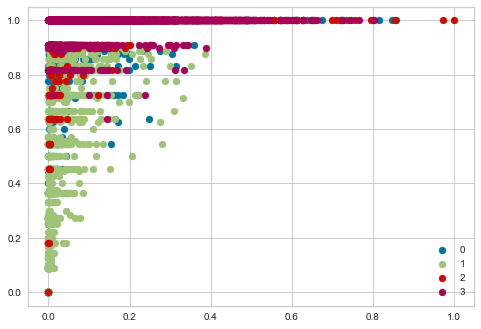

In [20]:
agglomerative = AgglomerativeClustering(n_clusters=4).fit(scaler_customer_df)
A_labels = agglomerative.labels_

unique_labels = np.unique(A_labels)
for i in unique_labels:
    plt.scatter(scaler_customer_df.iloc[A_labels == i , 0] , scaler_customer_df.iloc[A_labels == i , 1] , label = i)
plt.legend()
plt.show()

In [22]:
print("Silhouette Coefficient For  Agglomerative Clustering : %0.3f" % silhouette_score(scaler_customer_df,A_labels))

Silhouette Coefficient For  Agglomerative Clustering : 0.255


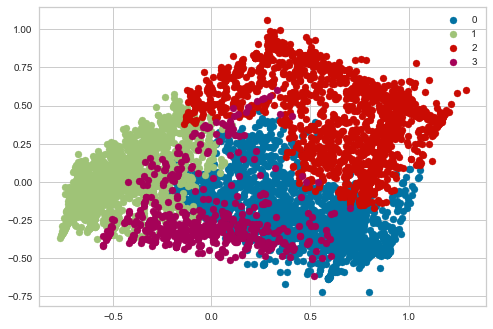

In [23]:
agglomerative = AgglomerativeClustering(n_clusters=4).fit(df_trans)
A_labels = agglomerative.labels_

unique_labels = np.unique(A_labels)
for i in unique_labels:
    plt.scatter(df_trans.iloc[A_labels == i , 0] , df_trans.iloc[A_labels == i , 1] , label = i)
plt.legend()
plt.show()

In [24]:
print("Silhouette Coefficient For Agglomerative Clustering  : %0.3f" % silhouette_score(df_trans,A_labels))

Silhouette Coefficient For Agglomerative Clustering  : 0.436


Text(0, 0.5, 'Distance')

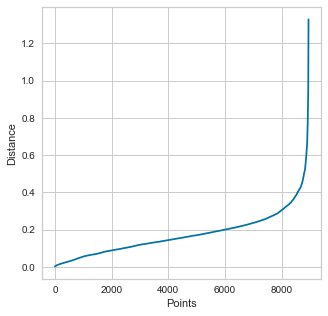

In [25]:
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(scaler_customer_df)

distances, indices = neighbors.kneighbors(scaler_customer_df)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")



0.288921978153391


<Figure size 360x360 with 0 Axes>

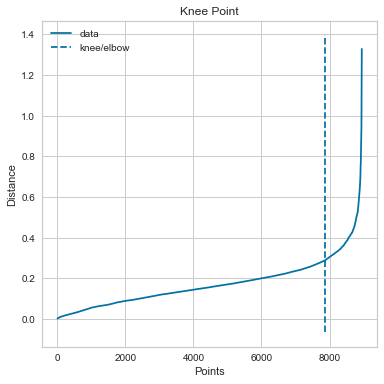

In [26]:
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

Number of clusters =  2
Number of noise =  402


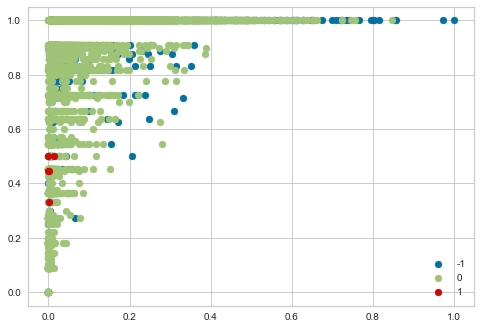

In [27]:
dbscan = DBSCAN(eps=0.288, min_samples=5).fit(scaler_customer_df)
dbscan_labels = dbscan.labels_
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)
print("Number of clusters = ",n_clusters)
print("Number of noise = ",n_noise)

u_labels = np.unique(dbscan_labels)
for i in u_labels:
    plt.scatter(scaler_customer_df.iloc[dbscan_labels == i , 0] , scaler_customer_df.iloc[dbscan_labels == i , 1] , label = i)
plt.legend()
plt.show()

In [28]:
print("Silhouette Coefficient For DBScan : %0.3f" % silhouette_score(scaler_customer_df,dbscan_labels))

Silhouette Coefficient For DBScan : 0.092


Text(0, 0.5, 'Distance')

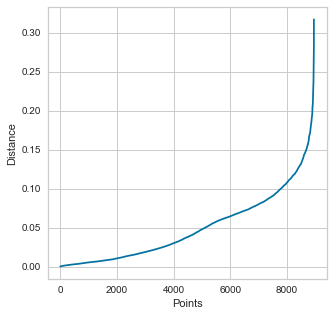

In [29]:
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(df_trans)

distances, indices = neighbors.kneighbors(df_trans)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

0.09522550487627124


<Figure size 360x360 with 0 Axes>

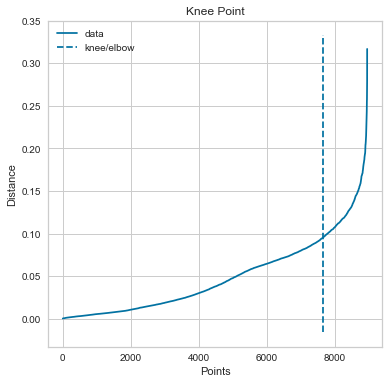

In [30]:
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

Number of clusters =  4
Number of noise =  68


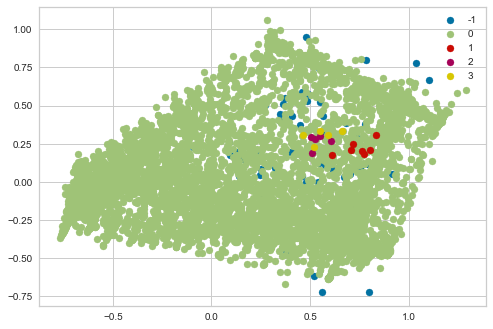

In [31]:
dbscan = DBSCAN(eps=0.12,min_samples=4).fit(df_trans)
dbscan_labels = dbscan.labels_
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)
print("Number of clusters = ",n_clusters)
print("Number of noise = ",n_noise)

u_labels = np.unique(dbscan_labels)
for i in u_labels:
    plt.scatter(df_trans.iloc[dbscan_labels == i , 0] , df_trans.iloc[dbscan_labels == i , 1] , label = i)
plt.legend()
plt.show()

In [32]:
print("Silhouette Coefficient For DBScan : %0.3f" % silhouette_score(df_trans,dbscan_labels))

Silhouette Coefficient For DBScan : 0.029


## Gaussian Mixture Model 

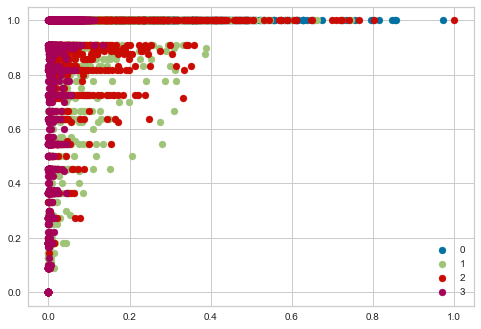

In [33]:
gmm = GaussianMixture(4).fit(scaler_customer_df)
gmm_labels = gmm.predict(scaler_customer_df)

u_labels = np.unique(gmm_labels)
for i in u_labels:
    plt.scatter(scaler_customer_df.iloc[gmm_labels == i , 0] , scaler_customer_df.iloc[gmm_labels == i , 1] , label = i)
plt.legend()
plt.show()

In [34]:
print("Silhouette Coefficient For Gaussian Mixtures : %0.3f" % silhouette_score(scaler_customer_df,gmm_labels))

Silhouette Coefficient For Gaussian Mixtures : 0.129


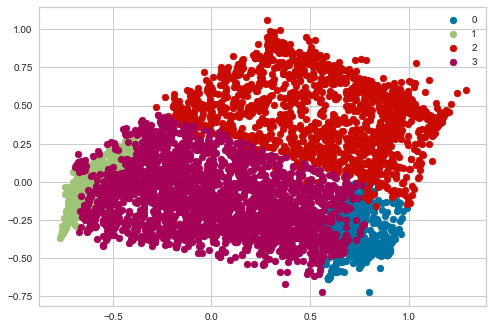

In [35]:
gmm = GaussianMixture(4).fit(df_trans)
gmm_labels = gmm.predict(df_trans)

u_labels = np.unique(gmm_labels)
for i in u_labels:
    plt.scatter(df_trans.iloc[gmm_labels == i , 0] , df_trans.iloc[gmm_labels == i , 1] , label = i)
plt.legend()
plt.show()

In [36]:
print("Silhouette Coefficient For Gaussian Mixtures : %0.3f" % silhouette_score(df_trans,gmm_labels))

Silhouette Coefficient For Gaussian Mixtures : 0.316


## Compare Between 4 Clustering Alogorithms 

In [37]:
# for 7 components
# print("Silhouette Coefficient For Kmeans : %0.3f" % silhouette_score(df_trans,k_labels))
# print("Silhouette Coefficient For Hierarchical : %0.3f" % silhouette_score(df_trans,A_labels))
# print("Silhouette Coefficient For Gaussian Mixtures : %0.3f" % silhouette_score(df_trans,gmm_labels))
# print("Silhouette Coefficient For DBScan : %0.3f" % silhouette_score(df_trans,dbscan_labels))
# Silhouette Coefficient For Kmeans : 0.468
# Silhouette Coefficient For Hierarchical : 0.399
# Silhouette Coefficient For Gaussian Mixtures : 0.035
# Silhouette Coefficient For DBScan : 0.546

In [38]:
# for 6 components 

# print("Silhouette Coefficient For Kmeans : %0.3f" % silhouette_score(df_trans,k_labels))
# print("Silhouette Coefficient For Hierarchical : %0.3f" % silhouette_score(df_trans,A_labels))
# print("Silhouette Coefficient For Gaussian Mixtures : %0.3f" % silhouette_score(df_trans,gmm_labels))
# print("Silhouette Coefficient For DBScan : %0.3f" % silhouette_score(df_trans,dbscan_labels))

# Silhouette Coefficient For Kmeans : 0.350
# Silhouette Coefficient For Hierarchical : 0.288
# Silhouette Coefficient For Gaussian Mixtures : 0.179
# Silhouette Coefficient For DBScan : 0.088

In [39]:
# for 2 components 

print("Silhouette Coefficient For Kmeans : %0.3f" % silhouette_score(df_trans,k_labels))
print("Silhouette Coefficient For Hierarchical : %0.3f" % silhouette_score(df_trans,A_labels))
print("Silhouette Coefficient For Gaussian Mixtures : %0.3f" % silhouette_score(df_trans,gmm_labels))
print("Silhouette Coefficient For DBScan : %0.3f" % silhouette_score(df_trans,dbscan_labels))

# Silhouette Coefficient For Kmeans : 0.528
# Silhouette Coefficient For Hierarchical : 0.458
# Silhouette Coefficient For Gaussian Mixtures : 0.462
# Silhouette Coefficient For DBScan : 0.000

Silhouette Coefficient For Kmeans : 0.501
Silhouette Coefficient For Hierarchical : 0.436
Silhouette Coefficient For Gaussian Mixtures : 0.316
Silhouette Coefficient For DBScan : 0.029


In [40]:
# for 3 components

# print("Silhouette Coefficient For Kmeans : %0.3f" % silhouette_score(df_trans,k_labels))
# print("Silhouette Coefficient For Hierarchical : %0.3f" % silhouette_score(df_trans,A_labels))
# print("Silhouette Coefficient For Gaussian Mixtures : %0.3f" % silhouette_score(df_trans,gmm_labels))
# print("Silhouette Coefficient For DBScan : %0.3f" % silhouette_score(df_trans,dbscan_labels))

# Silhouette Coefficient For Kmeans : 0.501
# Silhouette Coefficient For Hierarchical : 0.436
# Silhouette Coefficient For Gaussian Mixtures : 0.290
# Silhouette Coefficient For DBScan : 0.029

In [41]:
final_df = pd.concat([customer_df.reset_index(drop = True),df_trans],axis = 1)
final_df.columns.values[-4:] = ['ERAN_H_SPEND_H','ERAN_H_SPEND_L','ERAN_L_SPEND_H','ERAN_L_SPEND_L']
final_df['kmean_label'] = k_labels
final_df['Class'] = final_df['kmean_label'].map({
    0:'ERAN_H_SPEND_H',
    1:'ERAN_H_SPEND_L',
    2:'ERAN_L_SPEND_H',
    3:'ERAN_L_SPEND_L'
})
final_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,ERAN_H_SPEND_H,ERAN_H_SPEND_L,ERAN_L_SPEND_H,ERAN_L_SPEND_L,kmean_label,Class
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,1000.0,201.802084,139.509787,0.000000,12,-0.482164,-0.097656,-0.046457,1,ERAN_H_SPEND_L
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,7000.0,4103.032597,1072.340217,0.222222,12,-0.608577,-0.019379,0.082143,1,ERAN_H_SPEND_L
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,0.304507,0.920946,0.012042,3,ERAN_L_SPEND_L
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,7500.0,0.000000,864.206542,0.000000,12,-0.588622,-0.005605,0.036900,1,ERAN_H_SPEND_L
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,-0.554354,0.052965,-0.084179,1,ERAN_H_SPEND_L


In [42]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

<AxesSubplot:xlabel='Class', ylabel='count'>

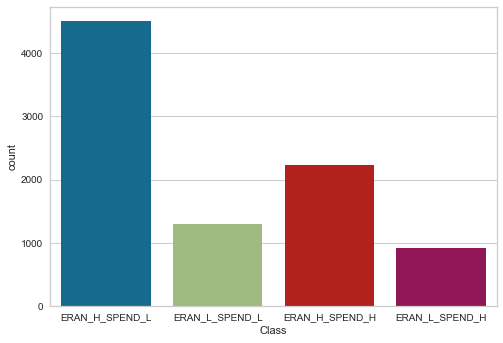

In [43]:
sns.countplot(x='Class', data=final_df)